In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import joblib

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

import os, sys

# Helpers
abspath = os.path.abspath
dirname = os.path.dirname
sep = os.sep
file_ = os.getcwd()

ml_folder = dirname(file_)
sys.path.append(ml_folder)

from src.utils import mining_data_tb as md
from src.utils import visualization_tb as vi
from src.utils import folder_tb as fo
from src.utils import models as mo


import warnings

warnings.filterwarnings("ignore")

In [2]:
# Variables' names
vardata = md.variables_data()

vardata_path = "data" + sep + "6_variables" + sep + "0_final_variables.csv"
vardata.load_data(2, vardata_path)


# Dataset
dataset = md.dataset()
folders = ["1_demographics", "2_dietary", "3_examination", "4_laboratory", "5_questionnaire"]
columns_correction = {
            "WTDRD1_x" : "WTDRD1",
            "WTDR2D_x" : "WTDR2D",
            "DRABF_x" : "DRABF",
            "DRDINT_x" : "DRDINT",
            "WTSAF2YR_x" : "WTSAF2YR",
            "LBXHCT_x" : "LBXHCT"
        }
dataset.load_data(2, folders, columns_correction)

In [3]:
var = "DID040"
print("Observations:", len(dataset.df[var]))
print("NaNs:", dataset.df[var].isna().sum())
dataset.df[var].head()

Observations: 29213
NaNs: 26783


SEQN
83732    46.0
83733     NaN
83734    52.0
83735     NaN
83736     NaN
Name: DID040, dtype: float64

In [4]:
# DR1TFIBE -> Fiber (day 1)
# DR1TVB6 -> Vitamin b6 (day 1)
# DR2TFIBE -> Fiber (day 2)
# DR2TVB6 -> Fiber (day 2)



In [18]:
dataset.reset_dataset()

In [19]:
features = ["MCQ160H", "RIAGENDR", "RIDAGEYR", "DR1TCHOL", "DR1TTFAT", "DR1TSFAT", "DR1TSUGR", "DR2TCHOL", "DR2TTFAT", "DR2TSFAT", "DR2TSUGR", "BPXDI1", "BPXSY1", "BMXWT", "DXDTOPF", "BMXWAIST", "LBXTR", "LBXTC", "LBXSGL", "DR1TFIBE", "DR1TVB6", "DR2TFIBE", "DR2TVB6"]
dataset.filter_columns(features, inplace = True)
features_names = vardata.vars_descr_detector(list(dataset.df.columns), 40, True)
dataset.df = dataset.df.drop(["LBXTR", "DXDTOPF"], axis = 1)
dataset.df = dataset.df.dropna()

In [20]:
test1 = dataset.df

<AxesSubplot:>

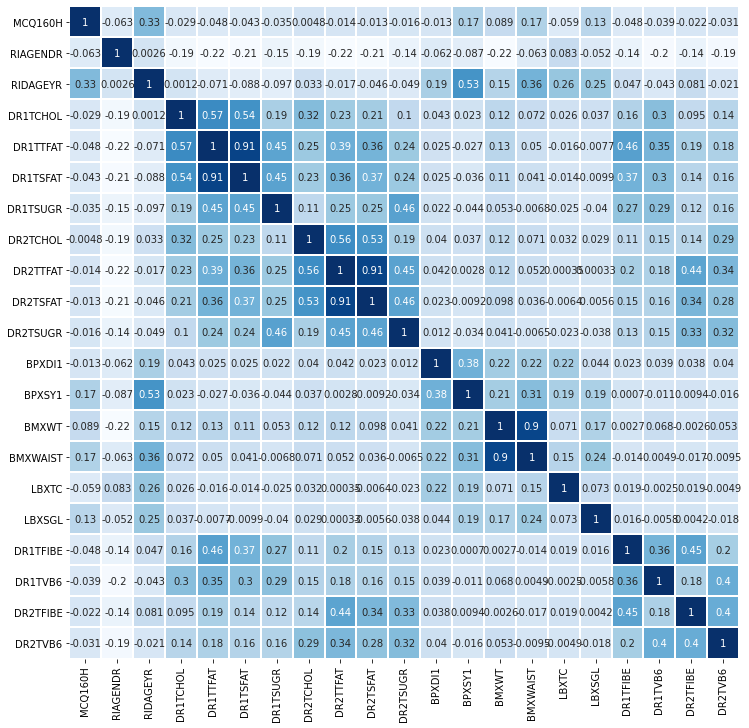

In [21]:
plt.figure(figsize = (12, 12))
sns.heatmap(dataset.df.corr(), annot = True, linewidths = .1, cmap = "Blues", cbar = False)

In [22]:
comb1 = [["DR1TCHOL", "DR2TCHOL"], "MEANCHOL"]
comb2 = [["DR1TTFAT", "DR2TTFAT"], "MEANTFAT"]
comb3 = [["DR1TSFAT", "DR2TSFAT"], "MEANSFAT"]
comb4 = [["DR1TSUGR", "DR2TSUGR"], "MEANSUGR"]
comb5 = [["DR1TFIBE", "DR2TFIBE"], "MEANFIBE"]
comb6 = [["DR1TVB6", "DR2TVB6"], "MEANTVB6"]

combs = [comb1, comb2, comb3, comb4, comb5, comb6]

dataset.pairs_mean(combs, drop_old = True)

In [23]:
test2 = dataset.df

<AxesSubplot:>

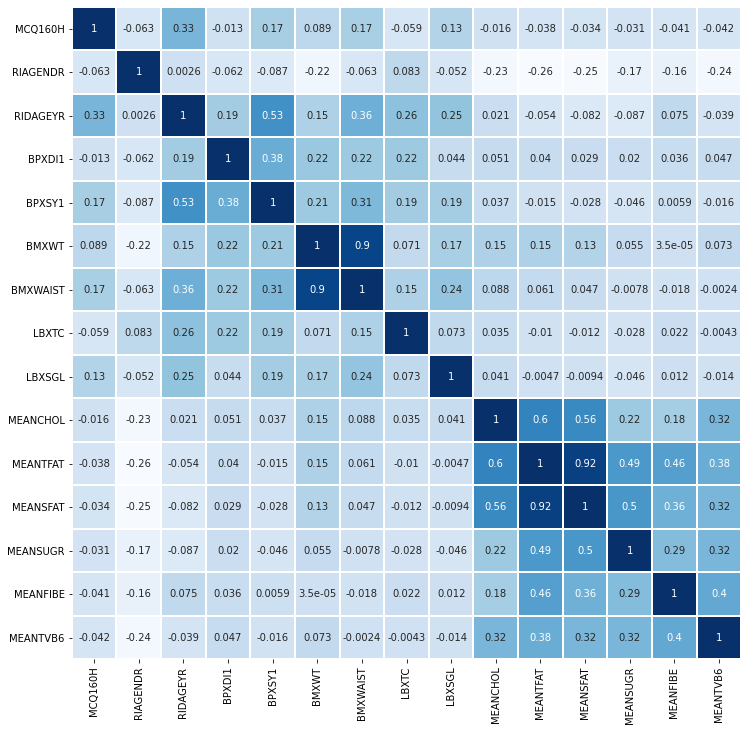

In [24]:
plt.figure(figsize = (12, 12))
sns.heatmap(dataset.df.corr(), annot = True, linewidths = .1, cmap = "Blues", cbar = False)

test = dataset.df

var1 = "DR1TCHOL"
var2 = "DR2TCHOL"
var3 = "DR1TTFAT"
var4 = "DR2TTFAT"
var5 = "DR1TSFAT"
var6 = "DR2TSFAT"
var7 = "DR1TSUGR"
var8 = "DR2TSUGR"
var9 = "DR1TFIBE"
var10 = "DR2TFIBE"
var11 = "DR1TVB6"
var12 = "DR2TVB6"


test["CHOLMEAN"] = test.loc[:, [var1, var2]].mean(axis = 1)
test["TFATMEAN"] = test.loc[:, [var3, var4]].mean(axis = 1)
test["SUGRMEAN"] = test.loc[:, [var5, var6]].mean(axis = 1)
test["FIBEMEAN"] = test.loc[:, [var7, var8]].mean(axis = 1)
test["FIBEMEAN"] = test.loc[:, [var9, var10]].mean(axis = 1)
test["TVB6MEAN"] = test.loc[:, [var11, var12]].mean(axis = 1)

test = test.drop([var1, var2, var3, var4, var5, var6, var7, var8, var9, var10, var11, var12], axis = 1)

print(test.shape)
test.head()

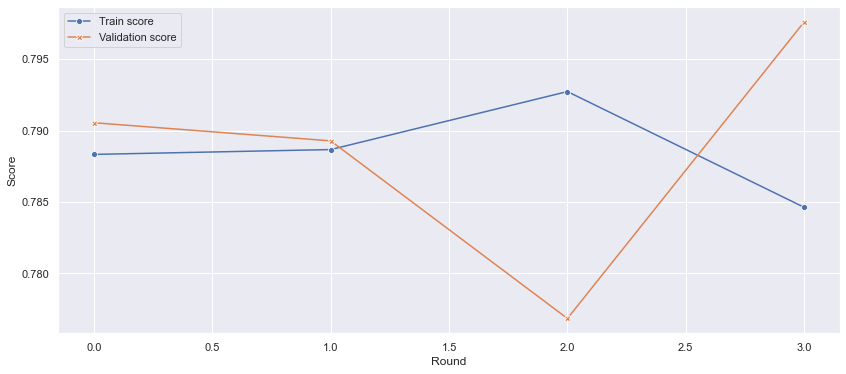

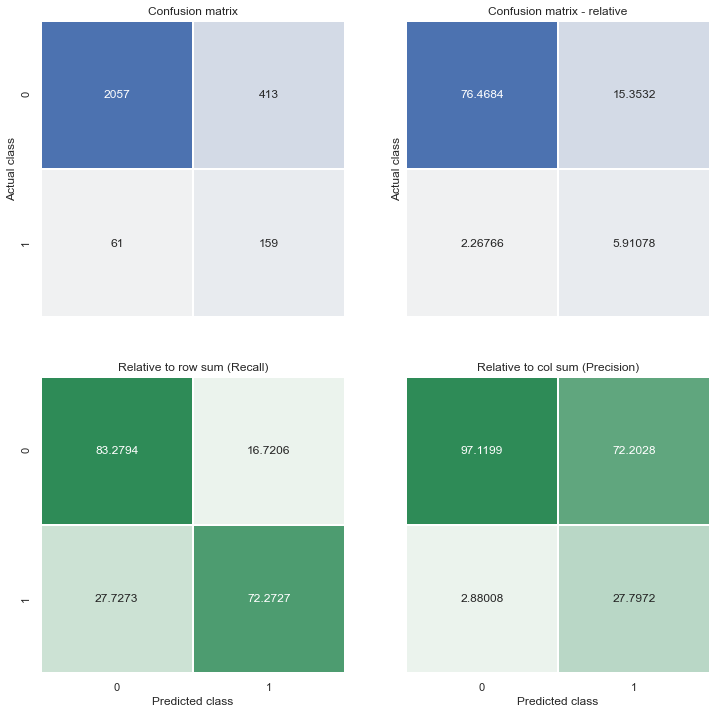

In [27]:
dataset.df = test2
dataset.model_data(split = .2, cv = 4, scaler = True, balance = .6)
features2 = list(dataset.df.columns)

model = LogisticRegression(n_jobs = -1, random_state = 42, max_iter = 300, warm_start = True)
#model = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42, warm_start = True)

my_model = mo.ml_model(model)
my_model.load_data(dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test, features2, dataset.kfold)
my_model.ml_trainer()
my_model.ml_tester()

plotter = vi.ml_model_plotter(my_model)

fig = plotter.train_val_plot()
fig2 = plotter.test_metrics()